## This Notebook will aim to Optimize linear Models

I have a lot of different automatic results in the previous notebook so just manually take most optimal features and reduce from there



## Start with Naive Bayes


'avg3Months_Loan', 'avg3Months_DebtCollection', 'avg6Months_Loan', 'avg6Months_Gambling', 'avg_Gambling', 'avg_Salary', 'avg3Months_Deposit', 'avg3Months_Gambling','avg_Loan', 'avg_HousingCost', 'avg3Months_CashWithdrawal' ,'avg6Months_DirectDebit', 'avg_Gaming', 'avg3Months_Gaming', 'avg_CashWithdrawal', 'avg_OtherIncome', 'avg6Months_CashWithdrawal', 'avg6Months_InstallmentPayment', 'avg_DirectDebit', 'avg6Months_HousingCost', 'avg6Months_Gaming', 'avg3Months_DirectDebit'
'count_Loan', 'trend_DebtCollection', 'sum_Loan', 'trend_Deposit', 'sum_Gambling', 'count_Gambling', 'sum_Salary', 'trend_CashWithdrawal', 'sum_DirectDebit',

'sum installmentPayments', 'trend_Loan', 'Gambling_sum9Months', 'MoneyRemittance_monthlyAvg','trend_Salary', 'MoneyRemittance_partOfSalary9Months', 'Gambling_sum12Months', 'trend_MoneyRemittance', 'Crypto_count3Months', 'trend_OtherIncome', 'trend_PassiveIncome', 'Gambling_count9Months', 'Gambling_partOfSalary3Months', 'MoneyRemittance_category',

'DebtCollection_count9Months', 'CashWithdrawal_sum3Months'

'DebtCollection_sum3Months', 'DebtCollection_sum9Months', 'InstallmentPayment_count12Months', 'DebtCollection_partOfSalary12Months', 'DebtCollection_sum12Months', 'InstallmentPayment_count9Months',



In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import os
import sqlalchemy as sa
import pyodbc
import warnings
import urllib
warnings.filterwarnings('ignore')

path = "./Classes"
os.chdir(path)

from HYPERTUNNER import ModelOptimizer
from DATAPREPROCESSOR import DataPreprocessor
from MODEL_FEATURE_EVALUATOR import ModelEvaluator ,FeatureImportance


iterations = 200



In [2]:

################### GET PAYMENT DATA ##########################

path = "../../1. Data/Cleaned Transaction Data"
os.chdir(path)


df = pd.read_excel('PreeProcessed_Psd2.xlsx')


In [3]:
df

,ReceivedDate,ApplicationID,AccountNumber,SSN,DisbursedDate,Amount,IsMainApplicant,ApplicantNo,HasCoapp,Ever90,...,Unclassified_partOfSalary9Months,Unclassified_sum12Months,Unclassified_sum3Months,Unclassified_sum6Months,Unclassified_sum9Months,sum creditors,sum debtCollectors,count creditors,count debtCollectors,_merge
0,2022-03-08,8205045,0,7711025523,2022-03-10,250000,1,1,0,1,...,50227.0,224.1,248.5,247.0,258.4,630444,81995,288551,519248,0
1,2022-04-07,8228347,0,9804048719,2022-04-22,400000,1,1,1,1,...,763.7,1333.3,1553.4,2678645.0,241491.0,1655157,2249127,0,0,0
2,2022-04-08,8229075,0,6501225061,2022-04-12,240000,1,1,0,1,...,85589.0,322.8,415.5,320.5,331.8,882268,279047,442904,685525,0
3,2022-04-11,8230481,0,9606236371,2022-04-13,295000,1,1,0,1,...,268.0,476.0,439.5,883993.0,100348.0,452428,627919,0,0,0
4,2022-04-15,8233936,0,8602147608,2022-06-08,270000,1,1,0,1,...,379.3,1362741.0,251386.0,547363.0,971946.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3488,2023-04-28,8660675,0,8902289209,2023-05-31,271000,1,1,1,0,...,195.3,381102.0,84024.0,274075.0,312523.0,0,0,0,0,0
3489,2023-04-28,8660675,0,8903213695,2023-05-31,271000,0,2,1,0,...,121.2,348937.0,91087.0,215240.0,265065.0,0,0,0,0,0
3490,2023-04-28,8660600,0,8007075586,2023-05-08,350000,1,1,1,0,...,40754.0,165.3,135.9,130.5,145.1,509094,147353,245526,367844,0
3491,2023-04-28,8660600,0,8203014934,2023-05-08,350000,0,2,1,0,...,38839.0,96.0,76.7,72.3,92.7,487593,113811,198074,353883,0


In [4]:
# pd.set_option('display.max_columns', None)

# git add .

# git commit -m "Finalised API Loop"

#  git status

#  git push origin Andreas

In [5]:
df = df.drop(columns=['ReceivedDate','AccountNumber','ApplicationID','SSN','DisbursedDate','Amount','IsMainApplicant','ApplicantNo','NR','_merge'])

base = df.drop(columns=['HasCoapp'])




In [6]:
features_list_NB = [ 'Ever90',
    'avg3Months_Loan', 'avg3Months_DebtCollection', 'avg6Months_Loan', 'avg6Months_Gambling', 'avg_Gambling', 'avg_Salary',
    'avg3Months_Deposit', 'avg3Months_Gambling', 'avg_Loan', 'avg_HousingCost', 'avg3Months_CashWithdrawal', 'avg6Months_DirectDebit',
    'avg_Gaming', 'avg3Months_Gaming', 'avg_CashWithdrawal', 'avg_OtherIncome', 'avg6Months_CashWithdrawal', 'avg6Months_InstallmentPayment',
    'avg_DirectDebit', 'avg6Months_HousingCost', 'avg6Months_Gaming', 'avg3Months_DirectDebit',
    'count_Loan', 'trend_DebtCollection', 'sum_Loan', 'trend_Deposit', 'sum_Gambling', 'count_Gambling',
    'sum_Salary', 'trend_CashWithdrawal', 'sum_DirectDebit',
    'trend_Loan', 'Gambling_sum9Months', 'MoneyRemittance_monthlyAvg', 'trend_Salary',
    'MoneyRemittance_partOfSalary9Months', 'Gambling_sum12Months', 'trend_MoneyRemittance', 'Crypto_count3Months',
    'trend_OtherIncome', 'trend_PassiveIncome', 'Gambling_count9Months', 'Gambling_partOfSalary3Months',
    'MoneyRemittance_category', 'DebtCollection_count9Months', 'CashWithdrawal_sum3Months',
    'DebtCollection_sum3Months', 'DebtCollection_sum9Months', 'InstallmentPayment_count12Months',
    'DebtCollection_partOfSalary12Months', 'DebtCollection_sum12Months', 'InstallmentPayment_count9Months'
]

[I 2024-05-27 11:57:03,542] A new study created in memory with name: no-name-4cf7c2b4-1e50-41e9-b693-0e365d58dc7f
[I 2024-05-27 11:57:03,543] A new study created in memory with name: no-name-94bc75c5-4f9b-46dd-8bcb-627c2969e8c2
[I 2024-05-27 11:57:03,543] A new study created in memory with name: no-name-ddca3e0e-d459-4fa5-9a53-657795d2eab3
[I 2024-05-27 11:57:03,544] A new study created in memory with name: no-name-0dd9d705-030c-4cbd-b8e3-713949f12950


Binary Split: Ever90
0    3170
1     323
Name: count, dtype: int64


[I 2024-05-27 11:57:04,107] Trial 0 finished with value: -0.07748859526830272 and parameters: {'nb_type': 'gaussian'}. Best is trial 0 with value: -0.07748859526830272.
[I 2024-05-27 11:57:04,500] Trial 1 finished with value: 0.1362757862712276 and parameters: {'nb_type': 'bernoulli', 'alpha': 0.04728615119957254, 'binarize': 0.2611656277346308}. Best is trial 1 with value: 0.1362757862712276.
[I 2024-05-27 11:57:04,657] Trial 2 finished with value: 0.22454430117174864 and parameters: {'nb_type': 'bernoulli', 'alpha': 0.18935184099043073, 'binarize': 0.014456917943183102}. Best is trial 2 with value: 0.22454430117174864.
[I 2024-05-27 11:57:04,699] Trial 0 finished with value: 0.17575258365211913 and parameters: {'C': 0.46700931169318016, 'solver': 'lbfgs'}. Best is trial 0 with value: 0.17575258365211913.
[I 2024-05-27 11:57:04,722] Trial 3 finished with value: 0.10738684110237966 and parameters: {'nb_type': 'bernoulli', 'alpha': 0.011457337804416793, 'binarize': 0.39960229243793927}.

Best parameters: {'naive_bayes': {'alpha': 0.9296085723487499, 'binarize': 0.001990665448191229}, 'xgboost': {'n_estimators': 20, 'max_depth': 3, 'learning_rate': 0.08302186170274552}, 'random_forest': {'n_estimators': 35, 'max_depth': 10, 'min_samples_split': 7, 'min_samples_leaf': 4}, 'logistic_regression': {'C': 0.007046802196369346, 'solver': 'saga', 'penalty_saga': 'elasticnet', 'l1_ratio': 0.1225756539077062}}


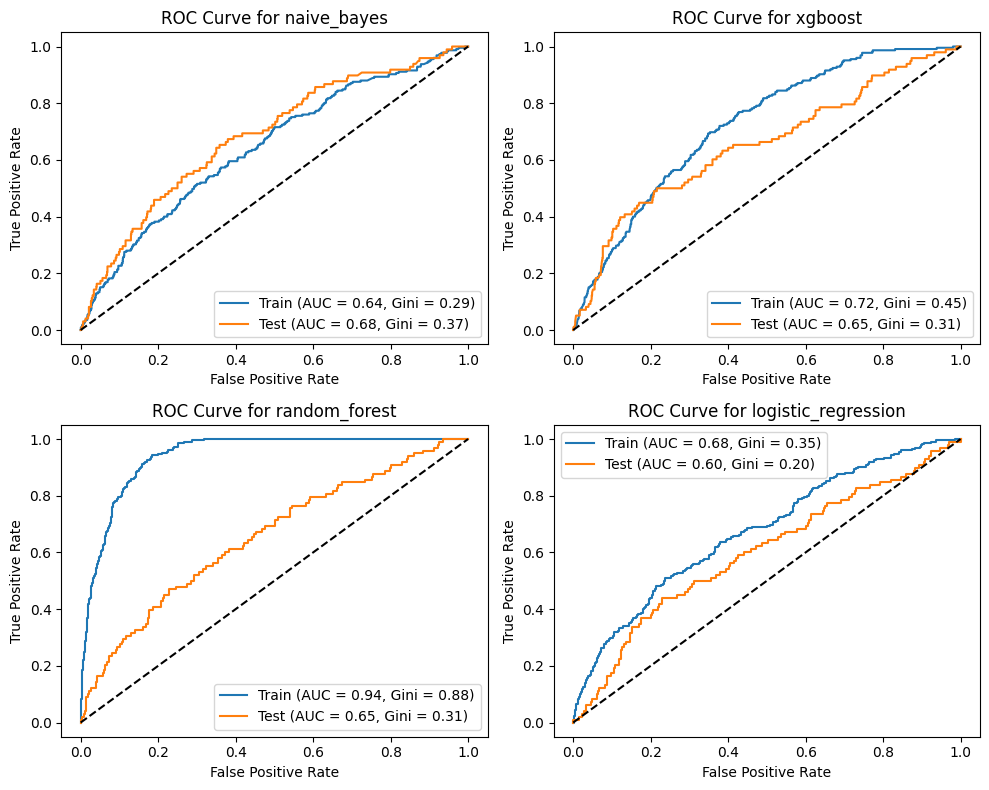

Available steps in pipeline: {'upsample': SMOTE(), 'model': RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=7,
                       n_estimators=35)}
Available steps in pipeline: {'upsample': SMOTE(), 'model': LogisticRegression(C=0.007046802196369346, l1_ratio=0.1225756539077062,
                   max_iter=10000, solver='saga')}
Available steps in pipeline: {'upsample': SMOTE(), 'model': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.08302186170274552, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=N

Non-zero features: ['avg3Months_Loan', 'avg3Months_DebtCollection', 'avg6Months_Loan', 'count_Loan', 'DebtCollection_sum3Months', 'trend_Loan', 'avg3Months_Deposit', 'DebtCollection_sum9Months', 'DebtCollection_sum12Months', 'sum_Salary', 'DebtCollection_partOfSalary12Months', 'avg_HousingCost', 'DebtCollection_count9Months', 'CashWithdrawal_sum3Months', 'sum_Loan', 'trend_DebtCollection', 'InstallmentPayment_count12Months', 'count_Gambling', 'Gambling_sum12Months', 'avg_OtherIncome', 'avg_Salary', 'avg6Months_InstallmentPayment', 'avg6Months_DirectDebit', 'avg6Months_Gambling', 'trend_Salary', 'trend_Deposit', 'avg_Gaming', 'Crypto_count3Months', 'trend_OtherIncome', 'InstallmentPayment_count9Months', 'avg_CashWithdrawal', 'avg_Loan', 'trend_PassiveIncome', 'avg6Months_CashWithdrawal', 'trend_CashWithdrawal', 'avg3Months_Gambling', 'MoneyRemittance_monthlyAvg', 'avg_Gambling', 'avg3Months_CashWithdrawal', 'Gambling_sum9Months', 'Gambling_partOfSalary3Months', 'Gambling_count9Months', 

In [7]:




forforsta = base[features_list_NB]

preprocessor = DataPreprocessor(forforsta)

(Xtrain, Ytrain), (Xtest, Ytest), train_upsampled,  = preprocessor.get_split_data_with_upsample_and_scaling(0.7,upsample= False)


models = ['naive_bayes', 'xgboost', 'random_forest', 'logistic_regression']


optimizer = ModelOptimizer(models, Xtrain, Ytrain, n_trials=iterations, early_stopping_rounds=10)
best_params, best_models = optimizer.run_models()
print("Best parameters:", best_params)

evaluator = ModelEvaluator(Xtrain, Ytrain, Xtest, Ytest, best_models)
evaluator.evaluate_models()
evaluator.plot_roc_curves()


feature_importance = FeatureImportance(train_upsampled, best_models, forforsta, run_correlation_cluster=True)
feature_importance.calculate_importances()
feature_importance.calculate_cumulative_importance()
features_to_keep, features_to_discard = feature_importance.find_highly_correlated_features()

print("Features to keep:", features_to_keep)
print("Features to discard:", features_to_discard)

sorted_features, non_zero_features = feature_importance.plot_importances()

# Filter away highly correlated features and take away the absolute worst
filtered_list = [item for item in sorted_features if item not in features_to_discard]
SelectionOne = filtered_list[:40]

print("Non-zero features:", non_zero_features)


[I 2024-05-27 11:57:48,000] A new study created in memory with name: no-name-e56aae0c-7490-4c04-b191-ee1148cad156
[I 2024-05-27 11:57:48,000] A new study created in memory with name: no-name-f8d8b973-15fc-4216-8d4e-cbd7878beb2b
[I 2024-05-27 11:57:48,000] A new study created in memory with name: no-name-cacbe124-9e0e-4112-b6fc-7a4be30741cb
[I 2024-05-27 11:57:48,001] A new study created in memory with name: no-name-312e3ec6-9b62-4f17-a2d0-6e8447950f35
[I 2024-05-27 11:57:48,064] Trial 0 finished with value: 0.23682355107245487 and parameters: {'nb_type': 'bernoulli', 'alpha': 0.09028712697793004, 'binarize': 0.0028634320130155777}. Best is trial 0 with value: 0.23682355107245487.
[I 2024-05-27 11:57:48,099] Trial 1 finished with value: -0.09042033089399919 and parameters: {'nb_type': 'gaussian'}. Best is trial 0 with value: 0.23682355107245487.
[I 2024-05-27 11:57:48,138] Trial 2 finished with value: 0.23682792482927084 and parameters: {'nb_type': 'bernoulli', 'alpha': 0.05317238775457

Binary Split: Ever90
0    3170
1     323
Name: count, dtype: int64


[I 2024-05-27 11:57:48,217] Trial 4 finished with value: 0.24715125319388784 and parameters: {'nb_type': 'bernoulli', 'alpha': 0.2875066054340862, 'binarize': 0.01787961310809439}. Best is trial 4 with value: 0.24715125319388784.
[I 2024-05-27 11:57:48,252] Trial 5 finished with value: 0.23571187716175346 and parameters: {'nb_type': 'bernoulli', 'alpha': 0.04187885164927343, 'binarize': 0.12002879075613032}. Best is trial 4 with value: 0.24715125319388784.
[I 2024-05-27 11:57:48,281] Trial 6 finished with value: -0.0832710876986481 and parameters: {'nb_type': 'gaussian'}. Best is trial 4 with value: 0.24715125319388784.
[I 2024-05-27 11:57:48,322] Trial 7 finished with value: -0.08773002825253935 and parameters: {'nb_type': 'gaussian'}. Best is trial 4 with value: 0.24715125319388784.
[I 2024-05-27 11:57:48,353] Trial 8 finished with value: -0.10235758356367912 and parameters: {'nb_type': 'gaussian'}. Best is trial 4 with value: 0.24715125319388784.
[I 2024-05-27 11:57:48,393] Trial 9 

Best parameters: {'naive_bayes': {'alpha': 0.8733616081323008, 'binarize': 0.02549962075246186}, 'xgboost': {'n_estimators': 32, 'max_depth': 3, 'learning_rate': 0.0697850959009093}, 'random_forest': {'n_estimators': 36, 'max_depth': 6, 'min_samples_split': 6, 'min_samples_leaf': 4}, 'logistic_regression': {'C': 0.03161991072101085, 'solver': 'liblinear', 'penalty_liblinear': 'l1'}}


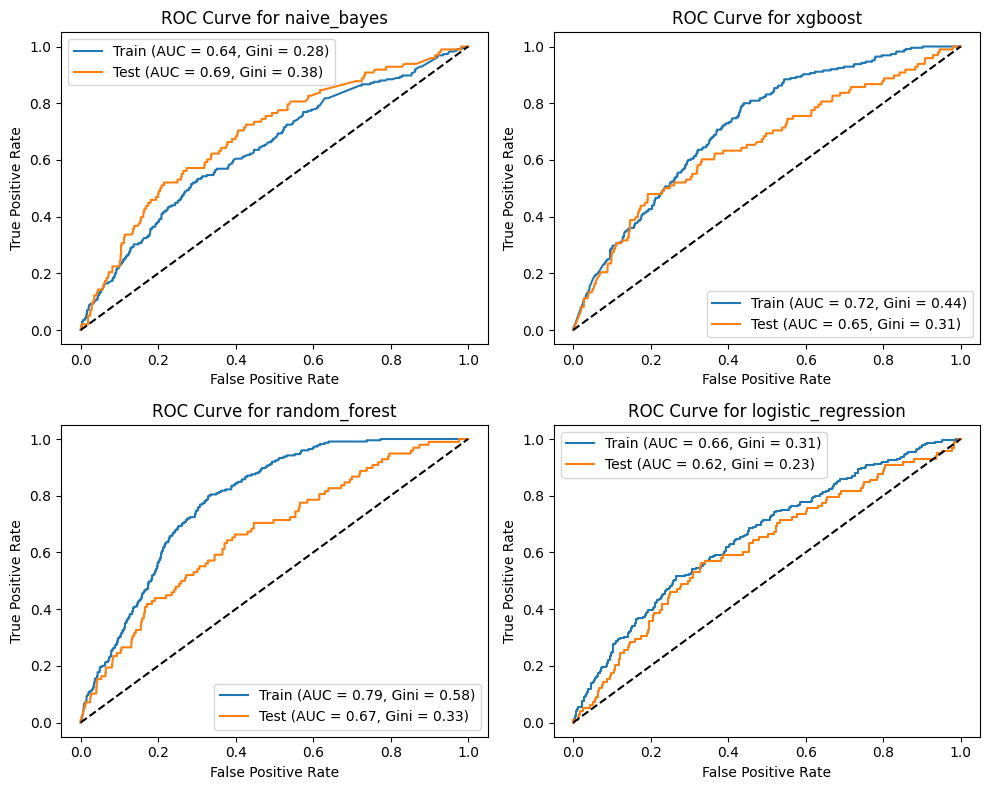

Available steps in pipeline: {'upsample': SMOTE(), 'model': RandomForestClassifier(max_depth=6, min_samples_leaf=4, min_samples_split=6,
                       n_estimators=36)}
Available steps in pipeline: {'upsample': SMOTE(), 'model': LogisticRegression(C=0.03161991072101085, max_iter=10000, solver='liblinear')}
Available steps in pipeline: {'upsample': SMOTE(), 'model': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.0697850959009093, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, miss

Non-zero features: ['avg3Months_Loan', 'avg3Months_DebtCollection', 'count_Loan', 'DebtCollection_sum3Months', 'avg6Months_DirectDebit', 'trend_Loan', 'Gambling_sum9Months', 'DebtCollection_partOfSalary12Months', 'sum_Loan', 'avg3Months_Deposit', 'CashWithdrawal_sum3Months', 'avg6Months_Loan', 'DebtCollection_sum9Months', 'sum_Salary', 'trend_Deposit', 'DebtCollection_sum12Months', 'Gambling_partOfSalary3Months', 'DebtCollection_count9Months', 'avg3Months_DirectDebit', 'Gambling_sum12Months', 'InstallmentPayment_count12Months', 'trend_Salary', 'avg_Salary', 'trend_CashWithdrawal', 'MoneyRemittance_monthlyAvg', 'avg_Loan', 'Crypto_count3Months', 'avg_CashWithdrawal']


In [8]:
features_list2 = ['Ever90','avg3Months_Loan', 'avg3Months_DebtCollection', 'avg6Months_Loan', 'DebtCollection_sum3Months', 'count_Loan', 'trend_Loan', 'DebtCollection_partOfSalary12Months', 'avg3Months_Deposit', 'sum_Loan', 'sum_Salary', 'DebtCollection_sum12Months','avg_Salary', 'avg_CashWithdrawal', 'avg3Months_DirectDebit','avg_Loan',
'InstallmentPayment_count12Months','DebtCollection_count9Months','trend_Salary', 'trend_CashWithdrawal','avg6Months_DirectDebit', 'DebtCollection_sum9Months', 'Gambling_sum12Months', 'Gambling_sum9Months', 'Crypto_count3Months', 'trend_Deposit', 'CashWithdrawal_sum3Months', 'Gambling_partOfSalary3Months','MoneyRemittance_monthlyAvg']


forforsta = base[features_list2]

preprocessor = DataPreprocessor(forforsta)

(Xtrain, Ytrain), (Xtest, Ytest), train_upsampled,  = preprocessor.get_split_data_with_upsample_and_scaling(0.7,upsample= False)


models = ['naive_bayes', 'xgboost', 'random_forest', 'logistic_regression']


optimizer = ModelOptimizer(models, Xtrain, Ytrain, n_trials=iterations, early_stopping_rounds=10)
best_params, best_models = optimizer.run_models()
print("Best parameters:", best_params)

evaluator = ModelEvaluator(Xtrain, Ytrain, Xtest, Ytest, best_models)
evaluator.evaluate_models()
evaluator.plot_roc_curves()


feature_importance = FeatureImportance(train_upsampled, best_models, forforsta, run_correlation_cluster=True)
feature_importance.calculate_importances()
feature_importance.calculate_cumulative_importance()
features_to_keep, features_to_discard = feature_importance.find_highly_correlated_features()

print("Features to keep:", features_to_keep)
print("Features to discard:", features_to_discard)

sorted_features, non_zero_features = feature_importance.plot_importances()

# Filter away highly correlated features and take away the absolute worst
filtered_list = [item for item in sorted_features if item not in features_to_discard]
SelectionOne = filtered_list[:40]

print("Non-zero features:", non_zero_features)



## Try only thoise that are quite high

In [9]:
features_list_NB_Reduced =  ['Ever90','avg3Months_Loan', 'DebtCollection_sum3Months', 'avg3Months_DebtCollection', 'avg3Months_Deposit', 'Gambling_sum9Months', 'avg6Months_DirectDebit', 'count_Loan','CashWithdrawal_sum3Months','Gambling_sum12Months', 'avg3Months_DirectDebit', 'trend_Deposit','trend_Salary', 'MoneyRemittance_monthlyAvg']

[I 2024-05-27 11:58:44,686] A new study created in memory with name: no-name-602e425f-6a69-440c-8beb-baa13ba4ecc1
[I 2024-05-27 11:58:44,686] A new study created in memory with name: no-name-8c6e343a-01b0-4028-a3b7-07b2229ee846
[I 2024-05-27 11:58:44,687] A new study created in memory with name: no-name-0a3308f0-e9a5-4374-8487-07bcf9e0e4a4
[I 2024-05-27 11:58:44,687] A new study created in memory with name: no-name-7001d52d-01a7-4240-9240-31c5f5bf534d
[I 2024-05-27 11:58:44,746] Trial 0 finished with value: -0.046131798016051086 and parameters: {'nb_type': 'gaussian'}. Best is trial 0 with value: -0.046131798016051086.
[I 2024-05-27 11:58:44,772] Trial 1 finished with value: -0.04792132383327626 and parameters: {'nb_type': 'gaussian'}. Best is trial 0 with value: -0.046131798016051086.
[I 2024-05-27 11:58:44,781] Trial 0 finished with value: 0.20345767988280908 and parameters: {'C': 2.350260857791645, 'solver': 'liblinear', 'penalty_liblinear': 'l1'}. Best is trial 0 with value: 0.2034

Binary Split: Ever90
0    3170
1     323
Name: count, dtype: int64


[I 2024-05-27 11:58:44,872] Trial 5 finished with value: 0.19390604623639832 and parameters: {'nb_type': 'bernoulli', 'alpha': 0.0014501576948094852, 'binarize': 0.37588665188855647}. Best is trial 5 with value: 0.19390604623639832.
[I 2024-05-27 11:58:44,915] Trial 6 finished with value: -0.047385345663468414 and parameters: {'nb_type': 'gaussian'}. Best is trial 5 with value: 0.19390604623639832.
[I 2024-05-27 11:58:44,937] Trial 7 finished with value: 0.21806378448956484 and parameters: {'nb_type': 'bernoulli', 'alpha': 0.3078357897778339, 'binarize': 0.026990993308908785}. Best is trial 7 with value: 0.21806378448956484.
[I 2024-05-27 11:58:44,958] Trial 8 finished with value: -0.04734776673082586 and parameters: {'nb_type': 'gaussian'}. Best is trial 7 with value: 0.21806378448956484.
[I 2024-05-27 11:58:44,966] Trial 0 finished with value: 0.2543427545984747 and parameters: {'n_estimators': 28, 'max_depth': 3, 'min_samples_split': 5, 'min_samples_leaf': 4}. Best is trial 0 with v

Best parameters: {'naive_bayes': {'alpha': 0.3078357897778339, 'binarize': 0.026990993308908785}, 'xgboost': {'n_estimators': 20, 'max_depth': 3, 'learning_rate': 0.14531985665513844}, 'random_forest': {'n_estimators': 34, 'max_depth': 3, 'min_samples_split': 8, 'min_samples_leaf': 2}, 'logistic_regression': {'C': 0.012489699279400432, 'solver': 'liblinear', 'penalty_liblinear': 'l1'}}


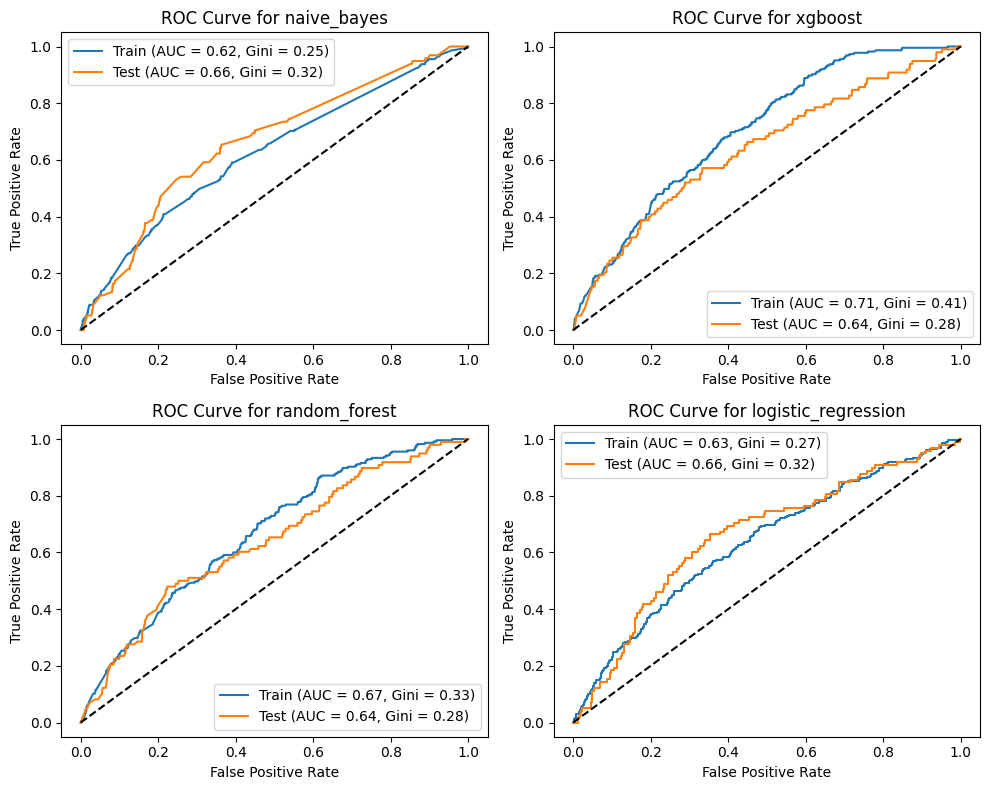

Available steps in pipeline: {'upsample': SMOTE(), 'model': RandomForestClassifier(max_depth=3, min_samples_leaf=2, min_samples_split=8,
                       n_estimators=34)}
Available steps in pipeline: {'upsample': SMOTE(), 'model': LogisticRegression(C=0.012489699279400432, max_iter=10000, solver='liblinear')}
Available steps in pipeline: {'upsample': SMOTE(), 'model': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.14531985665513844, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, mi

In [10]:

forforsta = base[features_list_NB_Reduced]

preprocessor = DataPreprocessor(forforsta)

(Xtrain, Ytrain), (Xtest, Ytest), train_upsampled,  = preprocessor.get_split_data_with_upsample_and_scaling(0.7,upsample= False)


models = ['naive_bayes', 'xgboost', 'random_forest', 'logistic_regression']


optimizer = ModelOptimizer(models, Xtrain, Ytrain, n_trials=iterations, early_stopping_rounds=10)
best_params, best_models = optimizer.run_models()
print("Best parameters:", best_params)

evaluator = ModelEvaluator(Xtrain, Ytrain, Xtest, Ytest, best_models)
evaluator.evaluate_models()
evaluator.plot_roc_curves()


feature_importance = FeatureImportance(train_upsampled, best_models, forforsta, run_correlation_cluster=True)
feature_importance.calculate_importances()
feature_importance.calculate_cumulative_importance()

## Do Recursive on the first set

In [ ]:
import pickle

# Assuming `base` and `features_list_NB` are already defined
forforsta = base[features_list_NB]

# Initialize the preprocessor with the selected features
preprocessor = DataPreprocessor(forforsta)

# Split and preprocess the data
(Xtrain, Ytrain), (Xtest, Ytest), train_upsampled = preprocessor.get_split_data_with_upsample_and_scaling(0.7, upsample=False)

# Define the models to be optimized
models = ['naive_bayes', 'xgboost', 'random_forest', 'logistic_regression']

# Initialize the optimizer with the models and training data
optimizer = ModelOptimizer(models, Xtrain, Ytrain, n_trials=1, early_stopping_rounds=10)

# Run the optimization process
best_params, best_models = optimizer.run_models()
print("Best parameters:", best_params)

# Dictionary to store the best features for each model
best_features_dict = {}

# Test different combinations of features for each model
for model in models:
    best_features, best_model = optimizer.evaluate_feature_combinations(model)
    best_features_dict[model] = best_features
    print(f"Best features for {model}: {best_features}")
    print(f"Trained model for {model}: {best_model}")

# Print the best features for each model again for clarity
for model in models:
    print(f"Best features for {model}: {best_features_dict[model]}")
    print(f"Trained model for {model}: {best_models[model]}")


[I 2024-05-27 10:53:58,520] A new study created in memory with name: no-name-8c59ae5d-f15b-44b8-8477-044254732165
[I 2024-05-27 10:53:58,520] A new study created in memory with name: no-name-6db13846-a0d3-42ad-a339-084898170490
[I 2024-05-27 10:53:58,520] A new study created in memory with name: no-name-4c932ea0-f159-4501-971e-2e0fcf0eb2dd
[I 2024-05-27 10:53:58,522] A new study created in memory with name: no-name-262404c3-e26d-4323-b269-121c01f20408
[I 2024-05-27 10:53:58,586] Trial 0 finished with value: 0.220179927029013 and parameters: {'nb_type': 'bernoulli', 'alpha': 0.0031815363563317905, 'binarize': 0.023108598192282406}. Best is trial 0 with value: 0.220179927029013.


Binary Split: Ever90
0    3170
1     323
Name: count, dtype: int64


[I 2024-05-27 10:53:58,971] Trial 0 finished with value: 0.2964708606492133 and parameters: {'n_estimators': 23, 'max_depth': 9, 'min_samples_split': 3, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.2964708606492133.
[I 2024-05-27 10:53:59,817] Trial 0 finished with value: 0.16756697717124056 and parameters: {'n_estimators': 22, 'max_depth': 13, 'learning_rate': 0.02933566079392247}. Best is trial 0 with value: 0.16756697717124056.
[I 2024-05-27 10:54:07,879] Trial 0 finished with value: 0.17542294389209698 and parameters: {'C': 0.4645662106942532, 'solver': 'saga', 'penalty_saga': 'l1'}. Best is trial 0 with value: 0.17542294389209698.
[I 2024-05-27 10:54:11,430] A new study created in memory with name: no-name-fc5ae64a-250a-42ab-a442-5fb3e81aa065
[I 2024-05-27 10:54:11,453] Trial 0 finished with value: -0.07941239702777492 and parameters: {'nb_type': 'gaussian'}. Best is trial 0 with value: -0.07941239702777492.
[I 2024-05-27 10:54:11,483] A new study created in memory with n

Best parameters: {'naive_bayes': {'alpha': 0.0031815363563317905, 'binarize': 0.023108598192282406}, 'xgboost': {'n_estimators': 22, 'max_depth': 13, 'learning_rate': 0.02933566079392247}, 'random_forest': {'n_estimators': 23, 'max_depth': 9, 'min_samples_split': 3, 'min_samples_leaf': 3}, 'logistic_regression': {'C': 0.4645662106942532, 'solver': 'saga', 'penalty_saga': 'l1'}}


[I 2024-05-27 10:54:11,656] A new study created in memory with name: no-name-21b0f30b-a008-4666-82dc-e90a0d3e9f41
[I 2024-05-27 10:54:11,682] Trial 0 finished with value: 0.2142169206500817 and parameters: {'nb_type': 'bernoulli', 'alpha': 0.10029833531362936, 'binarize': 0.00335143686486045}. Best is trial 0 with value: 0.2142169206500817.
[I 2024-05-27 10:54:11,714] A new study created in memory with name: no-name-5ce464ec-d683-49ca-b353-30ea0a1b62f7
[I 2024-05-27 10:54:11,737] Trial 0 finished with value: -0.07325158267284786 and parameters: {'nb_type': 'gaussian'}. Best is trial 0 with value: -0.07325158267284786.
[I 2024-05-27 10:54:11,828] A new study created in memory with name: no-name-6f9b70df-8e01-4fe8-ad23-fd5441d477bb
[I 2024-05-27 10:54:11,854] Trial 0 finished with value: 0.22047518777406339 and parameters: {'nb_type': 'bernoulli', 'alpha': 0.3421621869924577, 'binarize': 0.009754602952494213}. Best is trial 0 with value: 0.22047518777406339.
[I 2024-05-27 10:54:11,886] A

Best features for naive_bayes: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51]
Trained model for naive_bayes: Pipeline(steps=[('upsample', SMOTE()),
                ('model',
                 BernoulliNB(alpha=0.09657705418428099,
                             binarize=0.002397161155421898))])


[I 2024-05-27 10:54:17,755] Trial 0 finished with value: 0.211518071494844 and parameters: {'n_estimators': 23, 'max_depth': 7, 'learning_rate': 0.05716877687000881}. Best is trial 0 with value: 0.211518071494844.
[I 2024-05-27 10:54:18,524] A new study created in memory with name: no-name-0392b0d9-7877-454d-8944-00836228d175
[I 2024-05-27 10:54:18,735] Trial 0 finished with value: 0.21851922603800347 and parameters: {'n_estimators': 20, 'max_depth': 3, 'learning_rate': 0.28707901393996194}. Best is trial 0 with value: 0.21851922603800347.
[I 2024-05-27 10:54:19,014] A new study created in memory with name: no-name-3661dded-c10a-442f-8d2c-1fdae4166193
[I 2024-05-27 10:54:20,269] Trial 0 finished with value: 0.18431498445869132 and parameters: {'n_estimators': 33, 'max_depth': 12, 'learning_rate': 0.05599484439919631}. Best is trial 0 with value: 0.18431498445869132.
[I 2024-05-27 10:54:21,914] A new study created in memory with name: no-name-a497ba13-4f3d-4191-b1a8-bf1522f3dd08
[I 2024

KeyboardInterrupt: 

In [ ]:
evaluator = ModelEvaluator(Xtrain, Ytrain, Xtest, Ytest, best_models)
evaluator.evaluate_models()
evaluator.plot_roc_curves()

In [ ]:

# Save the Naive Bayes model and its best features to files
naive_bayes_model = best_models['naive_bayes']
naive_bayes_features = best_features_dict['naive_bayes']

model_filename = 'naive_bayes_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(naive_bayes_model, file)

features_filename = 'naive_bayes_features.txt'
with open(features_filename, 'w') as file:
    file.write(','.join(naive_bayes_features))

print(f"Naive Bayes model saved to {model_filename}")
print(f"Relevant features saved to {features_filename}")
